<a href="https://colab.research.google.com/github/Megalonnix/ChallengeAluraStore/blob/master/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [9]:
# 1. Lista de Faturamento individual por loja:
faturamentos_ = []

# 2. Função para agilizar coleta de faturamentos, dependendo do nome da loja:
def obterFaturamento(n_loja):
  if (n_loja == None):
    return round(sum(loja['Preço']),2)
  else: return round(sum(globals()[f'loja{n_loja}']['Preço']), 2)

# 3. Coleta de cada faturamento individual e armazenamento do mesmo na lista.
def pushFaturamento(n_loja = None):
  faturamento_loja = obterFaturamento(n_loja)
  faturamentos_.append(faturamento_loja)
  return faturamentos_

In [10]:
pushFaturamento()
pushFaturamento(2)
pushFaturamento(3)
pushFaturamento(4)

[1534509.12, 1488459.06, 1464025.03, 1384497.58]

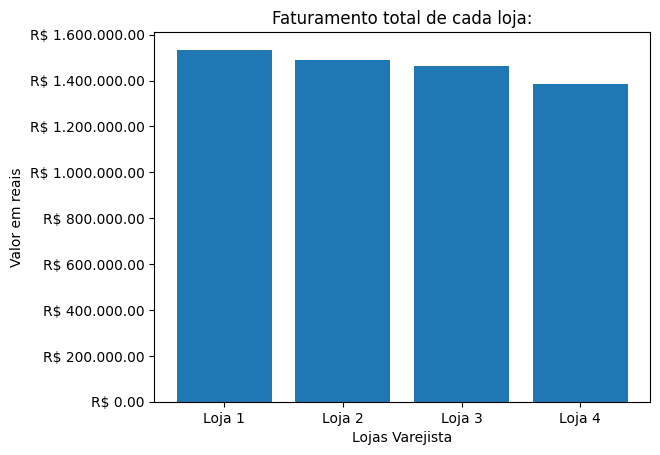

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Dados Gráfico de Barras:
categorias = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = faturamentos_

# Criando o gráfico de barras
plt.bar(categorias, valores)

# Adicionando título e rótulos
plt.title('Faturamento total de cada loja:')
plt.xlabel('Lojas Varejista')
plt.ylabel('Valor em reais')

# Formatação com ponto como separador
formatoEixoY = ticker\
  .FuncFormatter(
      lambda
      vlEixoY,
      argNaoUtilizado: f'R$ {vlEixoY:,.2f}'.replace(',', '.'))

# ---------------------
# NOTA DE APRENDIZADO:
# ---------------------
# plt.gca()                          => Get Current Axes (Pegou os eixos que eu fiz).
# .yaxis                             => Acessa o eixo Y.
# .set_major_formatter(formatoEixoY) => Define o formato que eu gerei nas linhas ACIMA.

plt.gca()\
   .yaxis\
   .set_major_formatter(formatoEixoY)

# Exibindo o gráfico
plt.show()


# 2. Vendas por Categoria


In [16]:
# Análise de categorias existentes no dataset (não sei quantas existem) :
categorias_existentes = list(loja['Categoria do Produto'].unique())
qtd_categorias = len(categorias_existentes)

info_categorias = {
  'categorias': categorias_existentes,
  'qtd_categorias': qtd_categorias
}

# Já averiquei, todas as lojas possuem a mesma qtd de categorias:
info_categorias

{'categorias': ['eletronicos',
  'moveis',
  'brinquedos',
  'eletrodomesticos',
  'utilidades domesticas',
  'esporte e lazer',
  'livros',
  'instrumentos musicais'],
 'qtd_categorias': 8}

In [17]:
# Obter um objeto informativo
# c/ quantidade de vendas exatas em cada loja individual:

def getQtdVendasPorCtgNaLoja(numLoja = None):

  tituloObj = 'Vendas por categoria Loja'
  resultado = ['']
  nmloja = ""

  if numLoja == None:
    resultado[0] = tituloObj + ' 1:'
    nmloja = f'loja{""}'
  else:
    resultado[0] = \
    tituloObj + f' {numLoja}:'
    nmloja = f'loja{numLoja}'

  for i in info_categorias['categorias']:
    nm_categoria = i
    vendasPorCategoria = len(
      [ j for j in globals()[nmloja]['Categoria do Produto'] if j == f'{nm_categoria}'])
    resultado.append([f'{nm_categoria}:', vendasPorCategoria])

  return resultado

In [24]:
contagem_Global_Vendas_Por_Categoria = [
  getQtdVendasPorCtgNaLoja(),
  getQtdVendasPorCtgNaLoja(2),
  getQtdVendasPorCtgNaLoja(3),
  getQtdVendasPorCtgNaLoja(4)
]

contagem_Global_Vendas_Por_Categoria

[['Vendas por categoria Loja 1:',
  ['eletronicos:', 448],
  ['moveis:', 465],
  ['brinquedos:', 324],
  ['eletrodomesticos:', 312],
  ['utilidades domesticas:', 171],
  ['esporte e lazer:', 284],
  ['livros:', 173],
  ['instrumentos musicais:', 182]],
 ['Vendas por categoria Loja 2:',
  ['eletronicos:', 422],
  ['moveis:', 442],
  ['brinquedos:', 313],
  ['eletrodomesticos:', 305],
  ['utilidades domesticas:', 181],
  ['esporte e lazer:', 275],
  ['livros:', 197],
  ['instrumentos musicais:', 224]],
 ['Vendas por categoria Loja 3:',
  ['eletronicos:', 451],
  ['moveis:', 499],
  ['brinquedos:', 315],
  ['eletrodomesticos:', 278],
  ['utilidades domesticas:', 177],
  ['esporte e lazer:', 277],
  ['livros:', 185],
  ['instrumentos musicais:', 177]],
 ['Vendas por categoria Loja 4:',
  ['eletronicos:', 451],
  ['moveis:', 480],
  ['brinquedos:', 338],
  ['eletrodomesticos:', 254],
  ['utilidades domesticas:', 201],
  ['esporte e lazer:', 277],
  ['livros:', 187],
  ['instrumentos musicai

In [91]:
# import matplotlib.pyplot as plt

# categorias = ['a','b','c','d','e','f','g']
# valores = [10,20,10,30,90,23,78]

# plt.bar(categorias, valores)

def getCategoriasProds():
  return [categoria for categoria in info_categorias['categorias']]

def extrairQtdVendasLoja(numLoja = None):
  dados_loja = getQtdVendasPorCtgNaLoja(numLoja)
  return [dados_loja[idx][1] for idx in range(len(dados_loja)) if idx > 0]

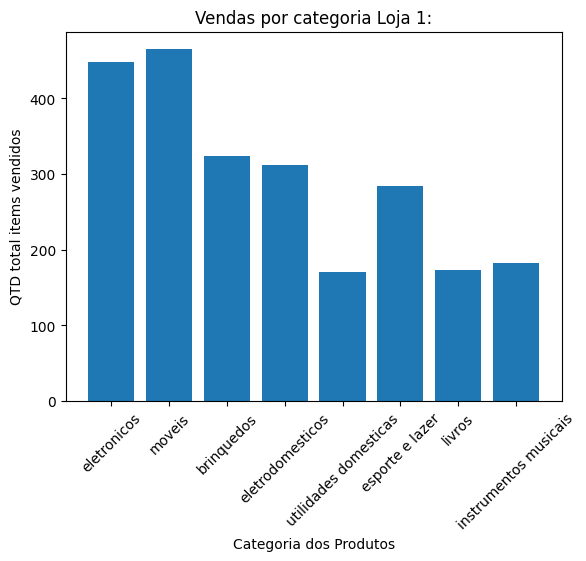

In [92]:
import matplotlib.pylab as plt

categorias = getCategoriasProds()
valores = extrairQtdVendasLoja()

plt.title('Vendas por categoria Loja 1:')
plt.xlabel('Categoria dos Produtos')
plt.ylabel('QTD total items vendidos')
plt.bar(categorias, valores)
plt.xticks(rotation=45)
plt.show()

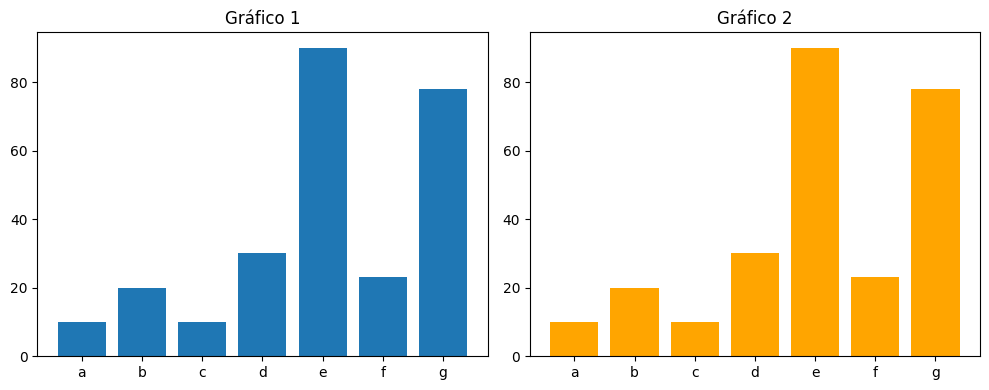

In [27]:
import matplotlib.pyplot as plt

categorias = ['a','b','c','d','e','f','g']
valores = [10,20,10,30,90,23,78]

# Cria uma figura com 1 linha e 2 colunas de subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # figsize controla o tamanho da figura

# Primeiro gráfico
axs[0].bar(categorias, valores)
axs[0].set_title('Gráfico 1')

# Segundo gráfico (pode ser o mesmo ou diferente)
axs[1].bar(categorias, valores, color='orange')
axs[1].set_title('Gráfico 2')

plt.tight_layout()  # Ajusta o layout para não sobrepor os gráficos
plt.show()


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
